### **Importing all required libraries**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

pd.set_option('display.max_columns', None)

### **Loading Data Set**

In [8]:
data_car = pd.read_csv(r"C:\Users\kzzyg\Downloads\used_cars_data-1.csv")

In [35]:
datan_ani= pd.read_csv(r"C:\Users\kzzyg\Downloads\anime_cleaned.csv")

In [36]:
datan_ani

mediaType   eps  duration  ongoing sznOfRelease  contentWarn   watched  \
0            TV  64.0       3.0    False       Spring            1  103707.0   
1         Movie   1.0     107.0    False   is_missing            0   58831.0   
2         Movie   1.0     130.0    False   is_missing            1   45892.0   
3            TV  10.0      12.0    False         Fall            0   25134.0   
4            TV  10.0       5.0    False       Spring            1   21308.0   
...         ...   ...       ...      ...          ...          ...       ...   
12096     Movie   1.0      98.5    False   is_missing            0      22.0   
12097        TV  12.0       5.0    False       Winter            0      13.0   
12098       OVA   1.0      26.0    False   is_missing            0      17.0   
12099       Web   3.0      24.0     True   is_missing            0      61.0   
12100     Movie   1.0      20.0    False   is_missing            0      15.0   

       watching  wantWatch  dropped  rating    votes  tag_'Comedy'  \
0         14351      25810     2656   4.702  86547.0             0   
1          1453      21733      124   4.663  43960.0             0   
2           946      17148      132   4.661  33752.0             0   
3          2183       8082      167   4.660  17422.0             0   
4          3217       7864      174   4.650  15789.0             0   
...         ...        ...      ...     ...      ...           ...   
12096         1         29        1   2.807     10.0             0   
12097        10         77        2   2.090     10.0             1   
12098         0         65        0   2.543     10.0             1   
12099        31         22        0   3.941     10.0             0   
12100         1         19        1   2.925     10.0             1   

       tag_'Based on a Manga'  tag_'Action'  tag_'Fantasy'  tag_'Sci Fi'  \
0                           1             1              1             0   
1                           0             0              0             0   
2                           1             0              0             0   
3                           1             0              0             0   
4                           1             1              1             0   
...                       ...           ...            ...           ...   
12096                       0             0              0             0   
12097                       0             0              0             0   
12098                       0             1              0             0   
12099                       0             1              0             0   
12100                       1             0              0             1   

       tag_'Shounen'  tag_'Family Friendly'  tag_'Original Work'  \
0                  1                      0                    0   
1                  0                      0                    1   
2                  1                      0                    0   
3                  1                      0                    0   
4                  1                      0                    0   
...              ...                    ...                  ...   
12096              0                      1                    0   
12097              0                      0                    1   
12098              0                      0                    0   
12099              0                      0                    0   
12100              0                      0                    0   

       tag_'Non-Human Protagonists'  tag_'Adventure'  tag_'Short Episodes'  \
0                                 0                1                     0   
1                                 0                0                     0   
2                                 0                0                     0   
3                                 0                0                     0   
4                                 0                0                     0   
...   

In [29]:
data_car.sample(3)

S.No.                                         Name   Location  Year  \
3329   3329                Hyundai Grand i10 CRDi Sportz  Hyderabad  2016   
2644   2644  Toyota Innova 2.5 G (Diesel) 8 Seater BS IV       Pune  2008   
5810   5810                         Honda City i DTEC VX    Kolkata  2015   

      Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage   Engine  \
3329              75700    Diesel       Manual      First  24.0 kmpl  1120 CC   
2644             178280    Diesel       Manual      First  12.8 kmpl  2494 CC   
5810              30000    Diesel       Manual      First  25.1 kmpl  1498 CC   

         Power  Seats  New_Price  Price  
3329    70 bhp    5.0       7.45   5.70  
2644   102 bhp    8.0      24.01   5.90  
5810  98.6 bhp    5.0      13.58   6.95

In [34]:
data_car.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [11]:
dup = data_car.duplicated()
dup_sum = data_car.duplicated().sum()
print(dup)
print(dup_sum)

0

In [70]:
print(data_car.isnull().sum())

data_car[['Seats', 'Price']] = data_car[['Seats', 'Price']].fillna(data_car[['Seats', 'Price']].mean())

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                46
Power                175
Seats                  0
New_Price              0
Price                  0
dtype: int64


In [76]:
data_car[['Mileage','Engine', 'Power']] = data_car[['Mileage','Engine', 'Power']].fillna(data_car[['Mileage','Engine', 'Power']].mode())

In [79]:
print(data_car.isnull().sum())

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                46
Power                175
Seats                  0
New_Price              0
Price                  0
dtype: int64
Mileage      2
Engine      46
Power      175
dtype: int64


In [15]:
#checking data information
data_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [63]:
data_carn.isnull().sum()

Mileage      2
Engine      46
Power      175
Seats        0
Price        0
dtype: int64

In [80]:
#calculating the statistical summary for all numeriacl column
data_car.describe()

S.No.         Year  Kilometers_Driven        Seats    New_Price  \
count  7253.000000  7253.000000       7.253000e+03  7253.000000  7253.000000   
mean   3626.000000  2013.365366       5.869906e+04     5.279722    21.307322   
std    2093.905084     3.254421       8.442772e+04     0.808688    24.256314   
min       0.000000  1996.000000       1.710000e+02     0.000000     3.910000   
25%    1813.000000  2011.000000       3.400000e+04     5.000000     7.880000   
50%    3626.000000  2014.000000       5.341600e+04     5.000000    11.300000   
75%    5439.000000  2016.000000       7.300000e+04     5.000000    21.690000   
max    7252.000000  2019.000000       6.500000e+06    10.000000   375.000000   

             Price  
count  7253.000000  
mean      9.479468  
std      10.191695  
min       0.440000  
25%       3.850000  
50%       6.750000  
75%       9.479468  
max     160.000000

### **Performing Correlation**

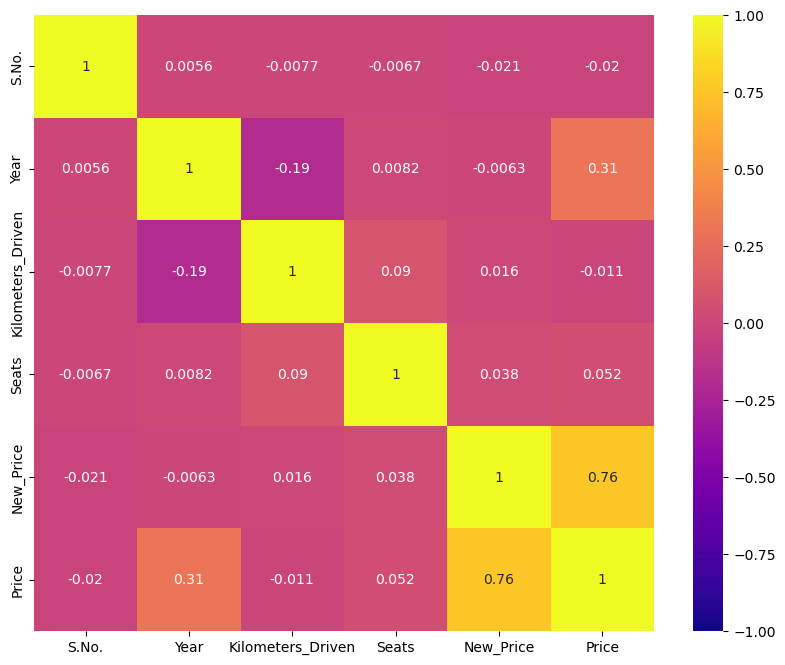

In [20]:
numeric_data = data_car.select_dtypes(include = 'number')

data_corr = numeric_data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(data_corr, vmin= -1, vmax=1,annot= True, cmap= 'plasma');
#plt.show()

### Selecting Non-Categorical Column

In [24]:
cate_col = data_car.select_dtypes(include='object').columns

In [25]:
cate_col

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')

In [27]:
for col in cate_col:
    print(data_car[col].value_counts())
    print('-' *50)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------

In [113]:
def histo_boxplot(data, feature, figsize=(13, 7), kde= False, bins= None):
    f1, (ax_box1, ax_histo1) = plt.subplots(
    n0_rows= 2, #setting rows number to 2
    sharex= True, #the subplot will share the axis
    grid_spec = {'height_ratios': (0.25, 0.75)}, figsize= figsize)
    #creating the two subplot
    sns.boxplot (data = data, x= features, ax = ax_box1, showmeans = True, color= 'magma')
    #creating the boxplots
    sns.histplot(data = data, x= features,kde= kde, ax= ax_histo1, bins= bins, palette= 'winter' )
    if bins else sns.histplot(data =data,x= features, kde= kde, ax= ax_histo1,)
    ax_histo1.axvline(data[feature].mean(), color= 'g', linestyle= '--')
    ax_histo1.axvline(data[feature].meadian(), color= 'b', linestyle= '-')

In [87]:
data_car['Price']= np.log(data_car['price'] + 1e-5)

In [112]:
histo_boxplot(data=data_car, feature = 'Price')

### **creating Barplot Function**

In [46]:
def label_Barplot(data, feature, perc=False, n= None):
    total= len(data[feature])
    count= data[feature].nunique()
    if n is None:
        plt.figure(figsize= (count+ 1, 5))
    else:
        plt.figure(figsize= (n + 1, 5))
    plt.xticks(rotation = 90, figsize = 12)
    ax =sns.countplot(data =data,
                      x = feature,
                      palette='Paired',
                      order = data[feature].value_counts().index[:n].sort_values())
    for p in ax.patches:
        if perc == True:
            label = '{:.1f}%'.format(
            100*p.get_height()/ total
            )
        else:
            label = p.get_height()
        x= p.get_x()+ p.get_width()/2
        y= p.get_height()
        ax.annotate(
            label,
            (x,y),
            ha= 'center',
            va= 'center',
            size= 10,
            xytext= (0,5),
            textcoords= 'offset points'
        )
    plt.show()

In [86]:
#label_Barplot(data= data_car, feature= 'Name', perc= True)

### **Performing Normalization**

In [98]:
Feat_norm = ['S.No.','Year','Kilometers_Driven','Seats', 'New_Price']
scaler = MinMaxScaler()

train_data = x_train.copy()
test_data = x_test.copy()

train_data[Feat_norm] = scaler.fit_transform(x_train[Feat_norm])
test_data[Feat_norm] = scaler.transform(x_test[Feat_norm])

In [92]:
x_train_scaled

array([[0.86956522, 0.01052405, 0.5       , 0.02780997],
       [0.69565217, 0.00513894, 0.5       , 0.02363308],
       [0.7826087 , 0.00621842, 0.5       , 0.0170848 ],
       ...,
       [0.69565217, 0.00944703, 0.8       , 0.0403002 ],
       [0.91304348, 0.0076007 , 0.5       , 0.03182516],
       [0.69565217, 0.01267809, 0.5       , 0.01069821]])

In [99]:
train_data

S.No.      Year  Kilometers_Driven  Seats  New_Price  \
4929  0.679768  0.869565           0.010524    0.5   0.027810   
5695  0.785409  0.695652           0.005139    0.5   0.023633   
776   0.107020  0.782609           0.006218    0.5   0.017085   
1590  0.219280  0.826087           0.004067    0.5   0.026058   
2459  0.339126  0.913043           0.004523    0.5   0.021504   
...        ...       ...                ...    ...        ...   
4931  0.680044  0.869565           0.010216    0.7   0.040300   
3264  0.450145  0.434783           0.022579    0.8   0.054165   
1653  0.227969  0.695652           0.009447    0.8   0.040300   
2607  0.359537  0.913043           0.007601    0.5   0.031825   
2732  0.376776  0.695652           0.012678    0.5   0.010698   

      Name_Audi A3 35 TDI Attraction  Name_Audi A3 35 TDI Premium  \
4929                               0                            0   
5695                               0                            0   
776                                0                            0   
1590                               0                            0   
2459                               0                            0   
...                              ...                          ...   
4931                               0                            0   
3264                               0                            0   
1653                               0                            0   
2607                               0                            0   
2732                               0                            0   

      Name_Audi A3 35 TDI Premium Plus  Name_Audi A3 35 TDI Technology  \
4929                                 0                               0   
5695                                 0                               0   
776                                  0                               0   
1590                                 0                               0   
2459                                 0                               0   
...                                ...                             ...   
4931                                 0                               0   
3264                                 0                               0   
1653                                 0                               0   
2607                                 0                               0   
2732                                 0                               0   

      Name_Audi A4 1.8 TFSI  Name_Audi A4 1.8 TFSI Technology Edition  \
4929                      0                                         0   
5695                      0                                         0   
776                       0                                         0   
1590                      0                                         0   
2459                      0                                         0   
...                     ...                                       ...   
4931                      0                                         0   
3264                      0                                         0   
1653                      0                                         0   
2607                      0                                         0   
2732                      0                                         0   

      Name_Audi A4 2.0 TDI  Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
4929                     0                                          0   
5695                     0                                          0   
776                      0                                          0   
1590                     0                                          0   
2459                     0                                          0   
...                    ...                                        ...   
4931                     0                                          0   
3264                     0                       

### **Performing one-hot Encoding**

In [84]:
x = pd.get_dummies(x, drop_first= True)

In [85]:
x

S.No.  Year  Kilometers_Driven  Seats  New_Price  \
0         0  2010              72000    5.0       5.51   
1         1  2015              41000    5.0      16.06   
2         2  2011              46000    5.0       8.61   
3         3  2012              87000    7.0      11.27   
4         4  2013              40670    5.0      53.14   
...     ...   ...                ...    ...        ...   
7248   7248  2011              89411    5.0      13.23   
7249   7249  2015              59000    5.0      10.15   
7250   7250  2012              28000    5.0       9.47   
7251   7251  2013              52262    5.0      10.15   
7252   7252  2014              72443    5.0      86.97   

      Name_Audi A3 35 TDI Attraction  Name_Audi A3 35 TDI Premium  \
0                                  0                            0   
1                                  0                            0   
2                                  0                            0   
3                                  0                            0   
4                                  0                            0   
...                              ...                          ...   
7248                               0                            0   
7249                               0                            0   
7250                               0                            0   
7251                               0                            0   
7252                               0                            0   

      Name_Audi A3 35 TDI Premium Plus  Name_Audi A3 35 TDI Technology  \
0                                    0                               0   
1                                    0                               0   
2                                    0                               0   
3                                    0                               0   
4                                    0                               0   
...                                ...                             ...   
7248                                 0                               0   
7249                                 0                               0   
7250                                 0                               0   
7251                                 0                               0   
7252                                 0                               0   

      Name_Audi A4 1.8 TFSI  Name_Audi A4 1.8 TFSI Technology Edition  \
0                         0                                         0   
1                         0                                         0   
2                         0                                         0   
3                         0                                         0   
4                         0                                         0   
...                     ...                                       ...   
7248                      0                                         0   
7249                      0                                         0   
7250                      0                                         0   
7251                      0                                         0   
7252                      0                                         0   

      Name_Audi A4 2.0 TDI  Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                        0                                          0   
1                        0                                          0   
2                        0                                          0   
3                        0                                          0   
4                        0                                          0   
...                    ...                                        ...   
7248                     0                                          0   
7249                     0                                          0   
7250                     0                               

### **Model Building**

In [82]:
x= data_car.drop(['Price'], axis= 1)
y= data_car['Price']

In [100]:
Lin_reg_mod = LinearRegression()
Lin_reg_mod.fit(train_data,y_train)

LinearRegression()

In [109]:
model_performance_regression(Lin_reg_mod, train_data, y_train)

RMSE       MAE  R-squred  Adj. R-squred       MAPE
0  3.350951  1.755604  0.889867       0.768186  25.774452

In [110]:
model_performance_regression(Lin_reg_mod, test_data, y_test)

RMSE           MAE      R-squred  Adj. R-squred          MAPE
0  3.725478e+12  7.680135e+11 -1.245353e+23   1.132139e+23  1.525625e+13

In [111]:
Lin_reg_mod.predict(test_data)

array([ 7.33398438e+00,  5.50000000e+00,  8.66308594e+00, ...,
        2.76074219e+00, -1.05353318e+12,  3.75585938e+00])

In [114]:
Lin_reg_mod.coef_

array([ 5.03979353e-01,  1.83588017e+01,  4.20703524e+00, ...,
       -3.22737559e+12, -4.12838571e+12, -1.72490110e+12])

In [83]:
y

0        1.750000
1       12.500000
2        4.500000
3        6.000000
4       17.740000
          ...    
7248     9.479468
7249     9.479468
7250     9.479468
7251     9.479468
7252     9.479468
Name: Price, Length: 7253, dtype: float64

In [88]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [89]:
x_train.shape

(5802, 3045)

In [108]:
def adj_r2_score(predictors, targets, predictions):
    r2= r2_score(targets, predictions)
    n= predictors.shape[0]
    k= predictors.shape[1]
    return 1 - ((1 - r2)* (n -1) / (n - k - 1))

def mape_score(targets,predictions):
    return np.mean(np.abs(targets - predictions) / targets)* 100

def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2= r2_score(target, pred)
    adjr2= adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)
    
    df_perf = pd.DataFrame(
        {
            'RMSE':rmse,
            'MAE': mae,
            'R-squred': r2,
            'Adj. R-squred': adjr2,
            'MAPE': mape
        },
        index= [0],
    )
    return df_perf